In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io 
from PIL import Image 

In [2]:
demo_fruitnut = pd.read_csv('../data/fruittreenuttotals_demographics.csv')
demo_berries = pd.read_csv('../data/demographics_berries.csv')
demo_citrus = pd.read_csv('../data/demographics_citrus.csv')
demo_vegetables = pd.read_csv('../data/demographics_vegetables.csv')

In [3]:
demo_vegetables['Data Item'].unique()

array(['VEGETABLE TOTALS, IN THE OPEN - ACRES HARVESTED',
       'VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODUCTION',
       'VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WITH AREA IN PRODUCTION',
       'VEGETABLE TOTALS, IN THE OPEN, IRRIGATED - ACRES IN PRODUCTION',
       'VEGETABLE TOTALS, IN THE OPEN, IRRIGATED - OPERATIONS WITH AREA IN PRODUCTION',
       'VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN THE OPEN - OPERATIONS WITH SALES',
       'VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN THE OPEN - SALES, MEASURED IN $',
       'VEGETABLE TOTALS - ACRES IN PRODUCTION',
       'VEGETABLE TOTALS - OPERATIONS WITH AREA IN PRODUCTION',
       'VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS - OPERATIONS WITH SALES',
       'VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS - SALES, MEASURED IN $',
       'VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WITH AREA HARVESTED'],
      dtype=object)

In [4]:
demo_vegetables.loc[(demo_vegetables['Data Item'] == 'VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WITH AREA IN PRODUCTION')
                    & (demo_vegetables['Domain'] == 'ORGANIZATION')]

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
18,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WIT...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION)","8,409",8.5
19,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WIT...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...","1,500",9.7
20,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WIT...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...","1,407",9.0
21,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WIT...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...","6,909",8.5
22,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WIT...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...","6,805",8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48007,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WIT...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI...",1,28.3
48008,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WIT...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, FAMILY & INDIVIDUAL)",44,38.3
48009,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WIT...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, INSTITUTIONAL & R...",2,31.7
48010,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WIT...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, PARTNERSHIP)",4,23.7


In [5]:
demo_vegetables = demo_vegetables.loc[demo_vegetables['Value'] != ' (D)']
demo_vegetables = demo_vegetables.loc[demo_vegetables['Value'] != ' (Z)']
demo_vegetables['Value'] = demo_vegetables['Value'].str.replace(',', '')
demo_vegetables['Value'] = pd.to_numeric(demo_vegetables.Value, downcast='integer').fillna(0)
demo_vegetables

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - ACRES HARVESTED",PRODUCERS,PRODUCERS: (ETHNICITY = HISPANIC),545756,9.8
1,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - ACRES HARVESTED",PRODUCERS,"PRODUCERS: (RACE = ASIAN, ALONE OR COMBINED WI...",154666,24.2
2,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODU...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION)",1699850,8.3
3,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODU...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...",248133,8.4
4,CENSUS,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN - ACRES IN PRODU...",ORGANIZATION,"ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC...",166755,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48214,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN...",ORGANIZATION AND SALES,"ORGANIZATION: (TAX PURPOSES, PARTNERSHIP) AND ...",3013000,46.6
48215,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN...",ORGANIZATION AND SALES,"ORGANIZATION: (TAX PURPOSES, PARTNERSHIP, REGI...",3013000,46.6
48216,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN...",TENURE,TENURE: (FULL OWNER),166000,29.1
48225,CENSUS,2012,YEAR,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN...",TYPOLOGY,"TYPOLOGY: (FAMILY FARMS, GCFI (LESS THAN 150,0...",109000,32.7


In [6]:
demo_vegetables['Domain Category'] = demo_vegetables['Domain Category'].str[28:-1]

In [7]:
demo_org_counts = demo_vegetables.loc[(demo_vegetables['Domain'] == 'ORGANIZATION')
                & (demo_vegetables['Data Item'] == 'VEGETABLE TOTALS, IN THE OPEN - OPERATIONS WITH AREA IN PRODUCTION')].groupby(
                ['Year', 'Domain Category']).sum(
                'Value').fillna(0).reset_index()
demo_org_counts

,Year,Domain Category,Week Ending,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Value
0,2012,CORPORATION,0.0,1466.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,11956
1,2012,"CORPORATION, (EXCL FAMILY HELD)",0.0,1422.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1428
2,2012,"CORPORATION, (EXCL FAMILY HELD), LE 10 STOCKH...",0.0,1422.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1274
3,2012,"CORPORATION, FAMILY HELD",0.0,1466.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,10528
4,2012,"CORPORATION, FAMILY HELD, LE 10 STOCKHOLDERS",0.0,1466.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,10228
5,2012,FAMILY & INDIVIDUAL,0.0,1466.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,117550
6,2012,INSTITUTIONAL & RESEARCH & RESERVATION & OTHER,0.0,1466.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2708
7,2012,PARTNERSHIP,0.0,1466.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,11876
8,2012,"PARTNERSHIP, REGISTERED UNDER STATE LAW",0.0,1466.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,9402
9,2017,CORPORATION,0.0,1466.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,14576


In [8]:
demo_org_counts = demo_org_counts.pivot(index = 'Year', columns = 'Domain Category', values = 'Value').reset_index()

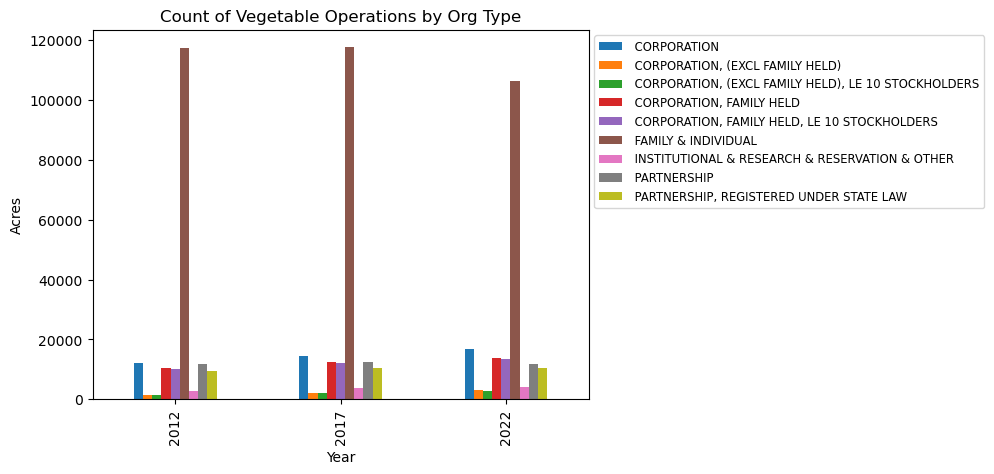

In [9]:
demo_org_counts_graph = demo_org_counts.plot(x = 'Year', y = list(
    demo_vegetables['Domain Category'].loc[(demo_vegetables['Domain'] == 'ORGANIZATION')].unique()), 
                                            kind = "bar", title = "Count of Vegetable Operations by Org Type",
                                                      ylabel = "Acres").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
demo_org_counts_graph.savefig('demo_org_counts_graph.png', transparent=True, bbox_inches='tight')

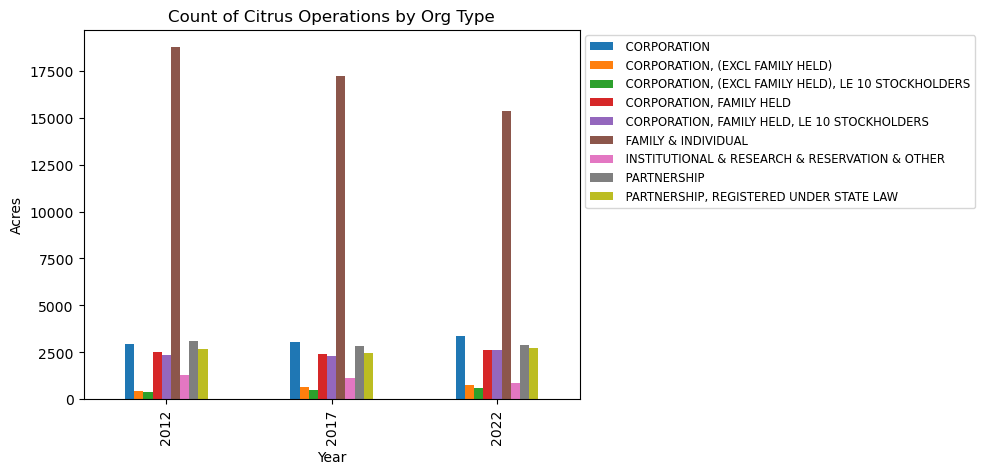

In [10]:
demo_citrus = demo_citrus.loc[demo_citrus['Value'] != ' (D)']
demo_citrus = demo_citrus.loc[demo_citrus['Value'] != ' (Z)']
demo_citrus['Value'] = demo_citrus['Value'].str.replace(',', '')
demo_citrus['Value'] = pd.to_numeric(demo_citrus.Value, downcast='integer').fillna(0)
demo_citrus['Domain Category'] = demo_citrus['Domain Category'].str[28:-1]
demo_citrus_org_counts = demo_citrus.loc[(demo_citrus['Domain'] == 'ORGANIZATION')
                & (demo_citrus['Data Item'] == 'CITRUS TOTALS - OPERATIONS WITH AREA BEARING & NON-BEARING')].groupby(
                ['Year', 'Domain Category']).sum(
                'Value').fillna(0).reset_index()
demo_citrus_org_counts = demo_citrus_org_counts.pivot(index = 'Year', columns = 'Domain Category', values = 'Value').reset_index()
demo_citrus_org_counts_graph = demo_citrus_org_counts.plot(x = 'Year', y = list(
    demo_citrus['Domain Category'].loc[(demo_citrus['Domain'] == 'ORGANIZATION')].unique()), 
                                            kind = "bar", title = "Count of Citrus Operations by Org Type",
                                                      ylabel = "Acres").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
demo_citrus_org_counts_graph.savefig('demo_citrus_org_counts_graph.png', transparent=True, bbox_inches='tight')

In [11]:
demo_citrus['Data Item'].unique()

array(['CITRUS TOTALS - ACRES BEARING & NON-BEARING',
       'CITRUS TOTALS - OPERATIONS WITH AREA BEARING & NON-BEARING'],
      dtype=object)

In [12]:
demo_berries['Data Item'].unique()

array(['BERRY TOTALS - ACRES GROWN',
       'BERRY TOTALS - OPERATIONS WITH AREA GROWN',
       'BERRY TOTALS - OPERATIONS WITH SALES',
       'BERRY TOTALS - SALES, MEASURED IN $'], dtype=object)

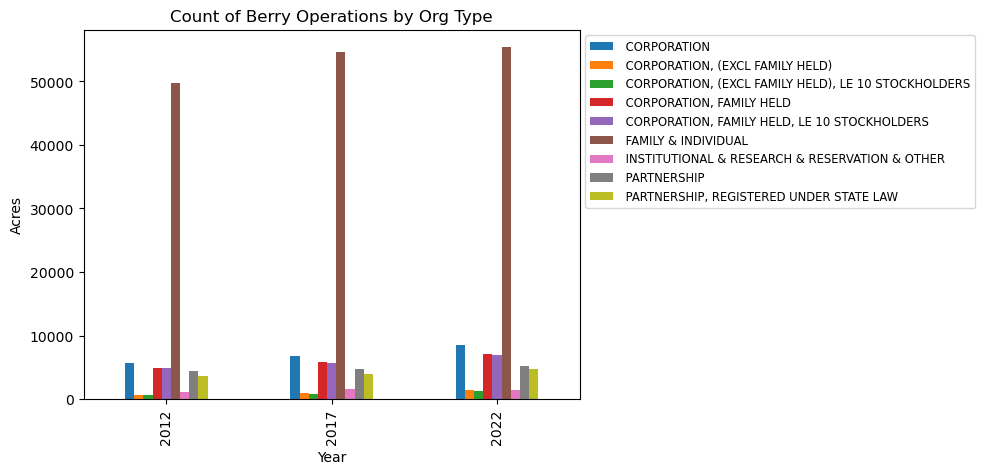

In [13]:
demo_berries = demo_berries.loc[demo_berries['Value'] != ' (D)']
demo_berries = demo_berries.loc[demo_berries['Value'] != ' (Z)']
demo_berries['Value'] = demo_berries['Value'].str.replace(',', '')
demo_berries['Value'] = pd.to_numeric(demo_berries.Value, downcast='integer').fillna(0)
demo_berries['Domain Category'] = demo_berries['Domain Category'].str[28:-1]
demo_berries_org_counts = demo_berries.loc[(demo_berries['Domain'] == 'ORGANIZATION')
                & (demo_berries['Data Item'] == 'BERRY TOTALS - OPERATIONS WITH AREA GROWN')].groupby(
                ['Year', 'Domain Category']).sum(
                'Value').fillna(0).reset_index()
demo_berries_org_counts = demo_berries_org_counts.pivot(index = 'Year', columns = 'Domain Category', values = 'Value').reset_index()
demo_berries_org_counts_graph = demo_berries_org_counts.plot(x = 'Year', y = list(
    demo_berries['Domain Category'].loc[(demo_berries['Domain'] == 'ORGANIZATION')].unique()), 
                                            kind = "bar", title = "Count of Berry Operations by Org Type",
                                                      ylabel = "Acres").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
demo_berries_org_counts_graph.savefig('demo_berries_org_counts_graph.png', transparent=True, bbox_inches='tight')

In [14]:
demo_fruitnut['Data Item'].unique()

array(['FRUIT & TREE NUT TOTALS - OPERATIONS WITH SALES',
       'FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $',
       'FRUIT & TREE NUT TOTALS, (EXCL BERRIES) - OPERATIONS WITH SALES',
       'FRUIT & TREE NUT TOTALS, (EXCL BERRIES) - SALES, MEASURED IN $'],
      dtype=object)

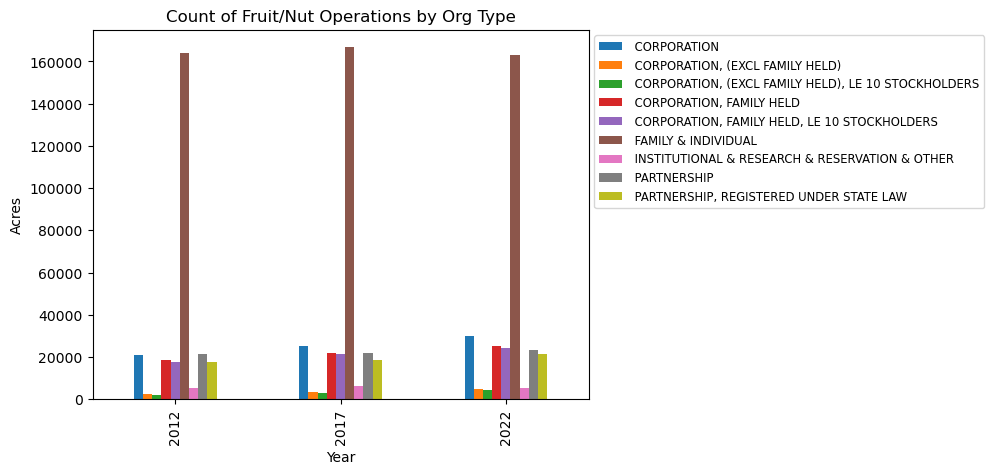

In [15]:
demo_fruitnut = demo_fruitnut.loc[demo_fruitnut['Value'] != ' (D)']
demo_fruitnut = demo_fruitnut.loc[demo_fruitnut['Value'] != ' (Z)']
demo_fruitnut['Value'] = demo_fruitnut['Value'].str.replace(',', '')
demo_fruitnut['Value'] = pd.to_numeric(demo_fruitnut.Value, downcast='integer').fillna(0)
demo_fruitnut['Domain Category'] = demo_fruitnut['Domain Category'].str[28:-1]
demo_fruitnut_org_counts = demo_fruitnut.loc[(demo_fruitnut['Domain'] == 'ORGANIZATION')
                & (demo_fruitnut['Data Item'] == 'FRUIT & TREE NUT TOTALS - OPERATIONS WITH SALES')].groupby(
                ['Year', 'Domain Category']).sum(
                'Value').fillna(0).reset_index()
demo_fruitnut_org_counts = demo_fruitnut_org_counts.pivot(index = 'Year', columns = 'Domain Category', values = 'Value').reset_index()
demo_fruitnut_org_counts_graph = demo_fruitnut_org_counts.plot(x = 'Year', y = list(
    demo_fruitnut['Domain Category'].loc[(demo_fruitnut['Domain'] == 'ORGANIZATION')].unique()), 
                                            kind = "bar", title = "Count of Fruit/Nut Operations by Org Type",
                                                      ylabel = "Acres").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
demo_fruitnut_org_counts_graph.savefig('demo_fruitnut_org_counts_graph.png', transparent=True, bbox_inches='tight')